In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../.venv/lib/python3.9/site-packages/')
sys.path.append('..')

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [13]:
data_df = pd.read_pickle("../data/study-3_2022/tomcat_agent/estimates/coordination/initially_uncoordinated/truncated_gaussian_blending_latent_vocalics/score_regression_data.pkl")
data_df["order"] = data_df['trial'].apply(lambda trial_number: 1 if int(trial_number[1:]) % 2 != 0 else 2)

In [14]:
plot_df = data_df[(data_df["estimation_name"] == "continuous_in_phase_variable") & (data_df["vocalics_aggregation"] == "mean") & (~data_df["fixed_coordination_second_half"])]
plot_df.head()

,trial,estimation_name,vocalics_aggregation,fixed_coordination_second_half,mean,variance,means,variances,score,order
1,T000812,continuous_in_phase_variable,mean,False,0.472806,0.015500,"[0.007885883893679354, 0.04324732320039379, 0....","[3.621199902701573e-05, 0.0010057445145865824,...",360,2
25,T000671,continuous_in_phase_variable,mean,False,0.454424,0.016030,"[0.007937384521755663, 0.04241248422463151, 0....","[3.699406215145652e-05, 0.0009844183948901346,...",470,1
49,T000841,continuous_in_phase_variable,mean,False,0.511477,0.013642,"[0.007920655321173612, 0.04289468540248944, 0....","[3.606073377688711e-05, 0.0009920375666408257,...",500,1
73,T000822,continuous_in_phase_variable,mean,False,0.469866,0.010248,"[0.007964034147058966, 0.0427905869915584, 0.0...","[3.7378159888773554e-05, 0.0009991451886199622...",290,2
97,T000792,continuous_in_phase_variable,mean,False,0.530687,0.009803,"[0.00799038067094928, 0.042420975384550696, 0....","[3.735263474565268e-05, 0.000999236005809672, ...",750,2


In [40]:
mission1_df = plot_df[plot_df["order"] == 1]
mission2_df = plot_df[plot_df["order"] == 2]

xs1 = mission1_df["mean"]
ys1 = mission1_df["score"]
result1 = linregress(xs1, ys1)
xs_line1 = np.array([0, 1])
ys_line1 = result1.slope * xs_line1 + result1.intercept

xs2 = mission2_df["mean"]
ys2 = mission2_df["score"]
result2 = linregress(xs2, ys2)
xs_line2 = np.array([0, 1])
ys_line2 = result2.slope * xs_line2 + result2.intercept

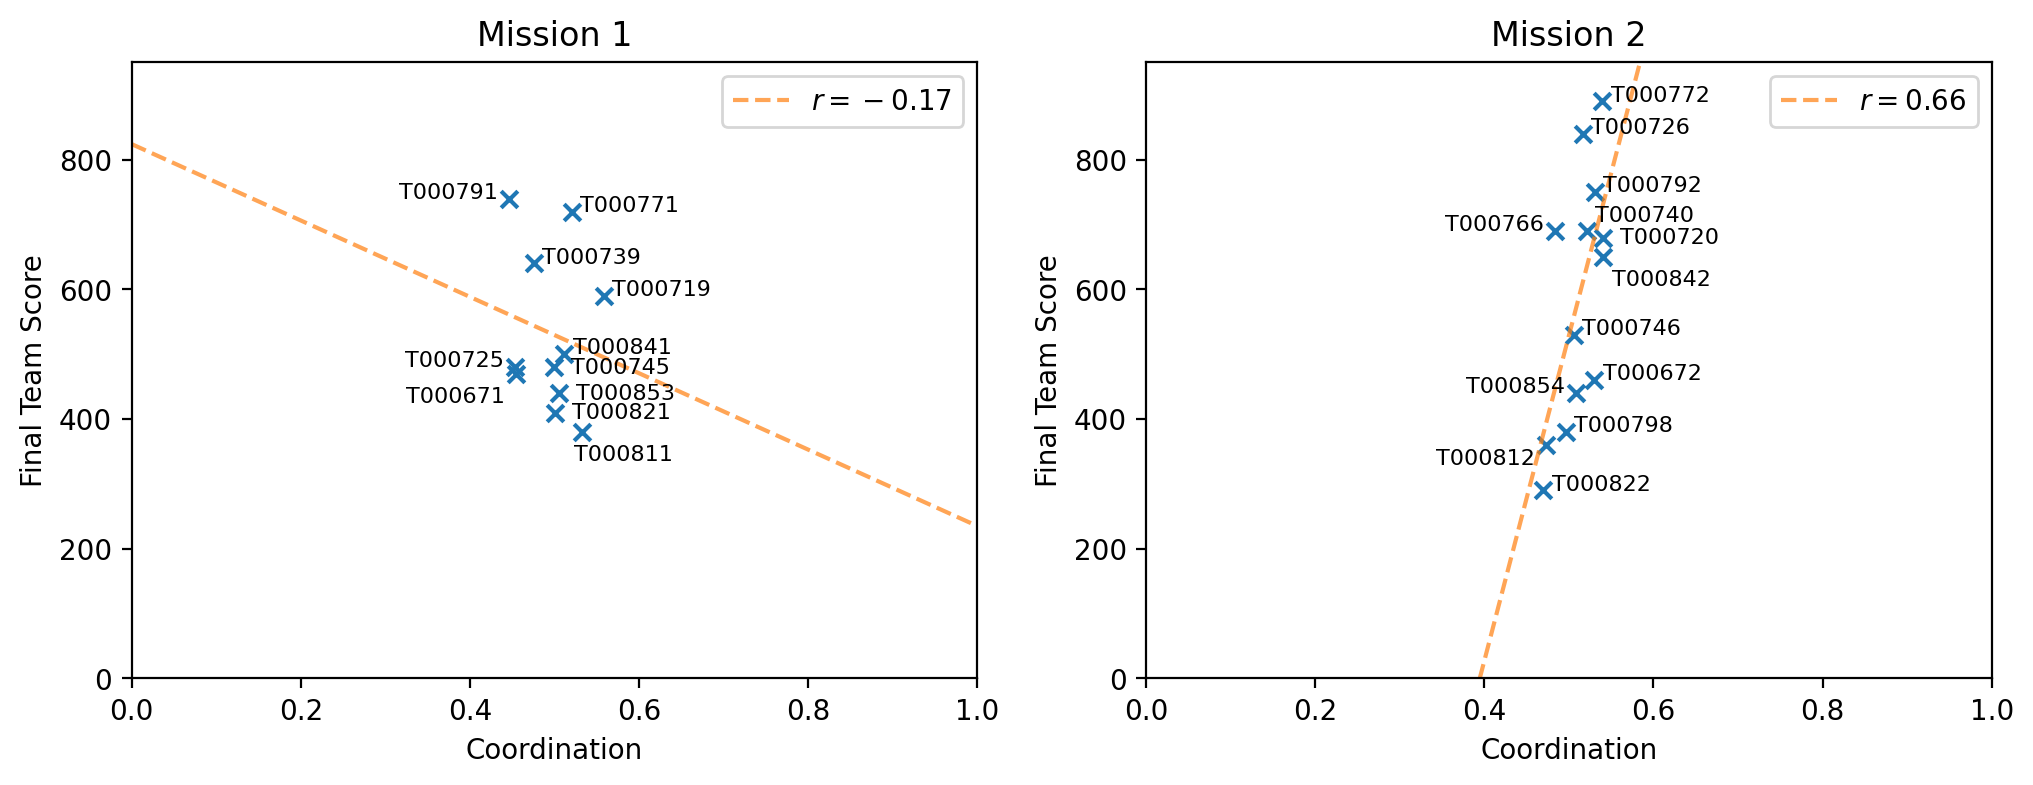

In [123]:
def format_axis(ax, title):
    ax.set_xlabel("Coordination")
    ax.set_ylabel("Final Team Score")
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 950])
    ax.set_title(title)
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].scatter(xs1, ys1, marker="x", color="tab:blue")
axs[0].plot(xs_line1, ys_line1, linestyle="--", color="tab:orange", alpha=0.7, label=f"$r = {result1.rvalue:.2f}$")
format_axis(axs[0], "Mission 1")
text_offsets = [(-0.13, -45), (0.01, 0), (0.01, 0), (0.02, -10), (0.02, -10), (-0.01, -45), 
                (0.02, -10), (0.01, 0), (-0.13, 0), (0.01, 0), (-0.13, 0)] 
for i, trial in enumerate(mission1_df["trial"]):
    x_text = mission1_df[mission1_df["trial"] == trial]["mean"] + text_offsets[i][0]
    y_text = mission1_df[mission1_df["trial"] == trial]["score"] + text_offsets[i][1]
    axs[0].annotate(trial, (x_text, y_text), fontsize=8)

axs[1].scatter(xs2, ys2, marker="x", color="tab:blue")
axs[1].plot(xs_line2, ys_line2, linestyle="--", color="tab:orange", alpha=0.7, label=f"$r = {result2.rvalue:.2f}$")
format_axis(axs[1], "Mission 2")
text_offsets = [(-0.13, -30), (0.01, 0), (0.01, 0), (-0.13, 0), (0.01, 0), (0.01, 0.02, -10), 
                (0.02, -10), (-0.13, 0), (0.01, -45), (0.01, 0), (0.01, 0), (0.01, 15), (0.01, 0)] 
for i, trial in enumerate(mission2_df["trial"]):
    x_text = mission2_df[mission2_df["trial"] == trial]["mean"] + text_offsets[i][0]
    y_text = mission2_df[mission2_df["trial"] == trial]["score"] + text_offsets[i][1]
    axs[1].annotate(trial, (x_text, y_text), fontsize=8)

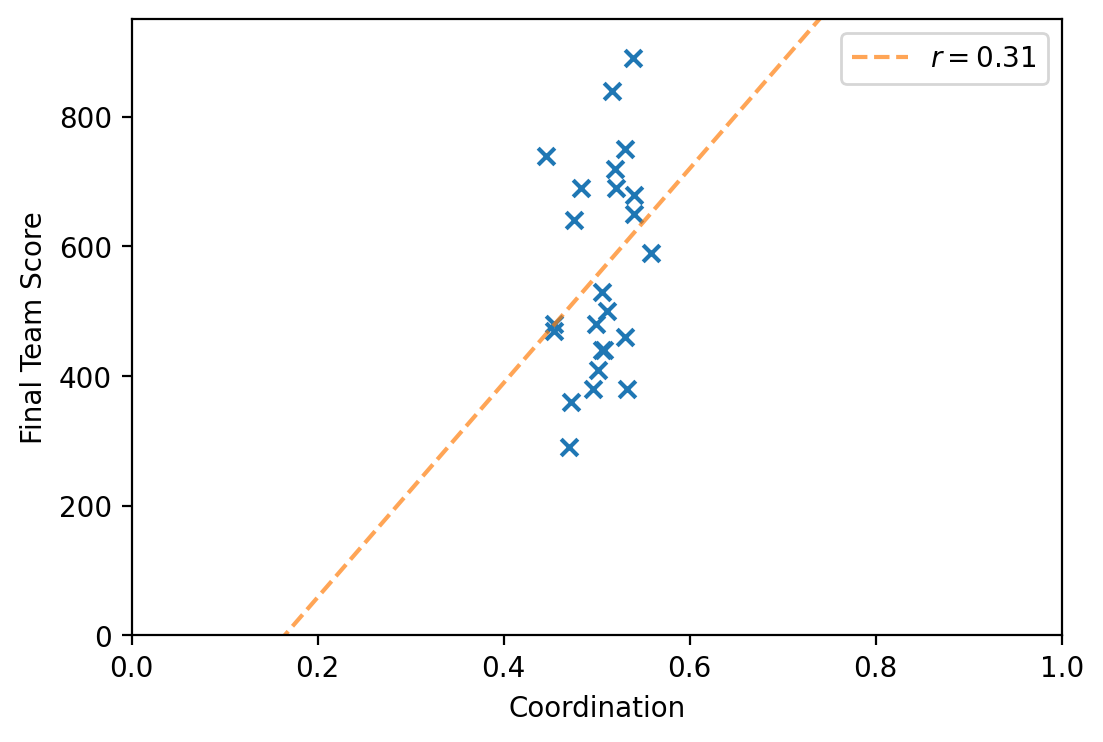

In [126]:
xs = pd.concat([xs1, xs2])
ys = pd.concat([ys1, ys2])
result = linregress(xs, ys)
xs_line = np.array([0, 1])
ys_line = result.slope * xs_line + result.intercept

fig = plt.figure(figsize=(6, 4))
plt.scatter(xs, ys, marker="x", color="tab:blue")
plt.plot(xs_line, ys_line, linestyle="--", color="tab:orange", alpha=0.7, label=f"$r = {result.rvalue:.2f}$")
format_axis(plt.gca(), "")